# Study $q^*$ behaviour
last edit Nov-7, 2022

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;
# from event_selection_tools        import *;

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

# (1) Load data:
All runs of $(e,e'\pi)$ data and all runs of $(e,e'\pi n)$ - as with a small number of runs normalization is off

In [3]:
[e_e_pi, e_e_pi_n,_] = load_SIDIS_data( Nruns          = -1, #Nruns          = 15,#-1, 
                subdirname      = "sidisdvcs_27Oct2022_commit_2fe215f",
                do_e_e_pi       = True, 
                do_e_e_pi_n     = True, 
                do_e_e_pi_FreeP = False, 
                do_all_vars     = True);
e_e_pi_pass_cuts,e_e_pi_n_pass_cuts,_,_ = apply_further_selection_cuts_to_data(fdebug=0);

Run number  6421 (1/86 runs)
Loaded 385297  d(e,e'π+) events
Loaded 46  d(e,e'π+n) events
Loaded 162638  d(e,e'π-) events
Loaded 21  d(e,e'π-n) events
Run number  6422 (2/86 runs)
Loaded 366918  d(e,e'π+) events
Loaded 64  d(e,e'π+n) events
Loaded 154361  d(e,e'π-) events
Loaded 28  d(e,e'π-n) events
Run number  6426 (3/86 runs)
Loaded 326566  d(e,e'π+) events
Loaded 29  d(e,e'π+n) events
Loaded 137027  d(e,e'π-) events
Loaded 13  d(e,e'π-n) events
Run number  6429 (4/86 runs)
Loaded 411636  d(e,e'π+) events
Loaded 63  d(e,e'π+n) events
Loaded 172739  d(e,e'π-) events
Loaded 17  d(e,e'π-n) events
Run number  6430 (5/86 runs)
Loaded 78744  d(e,e'π+) events
Loaded 8  d(e,e'π+n) events
Loaded 33100  d(e,e'π-) events
Loaded 4  d(e,e'π-n) events
Run number  6431 (6/86 runs)
Loaded 320743  d(e,e'π+) events
Loaded 52  d(e,e'π+n) events
Loaded 135621  d(e,e'π-) events
Loaded 17  d(e,e'π-n) events
Run number  6432 (7/86 runs)
Loaded 400648  d(e,e'π+) events
Loaded 57  d(e,e'π+n) events
Loaded 1

# (2) plot $q^*$

## (2.1) only untagged data

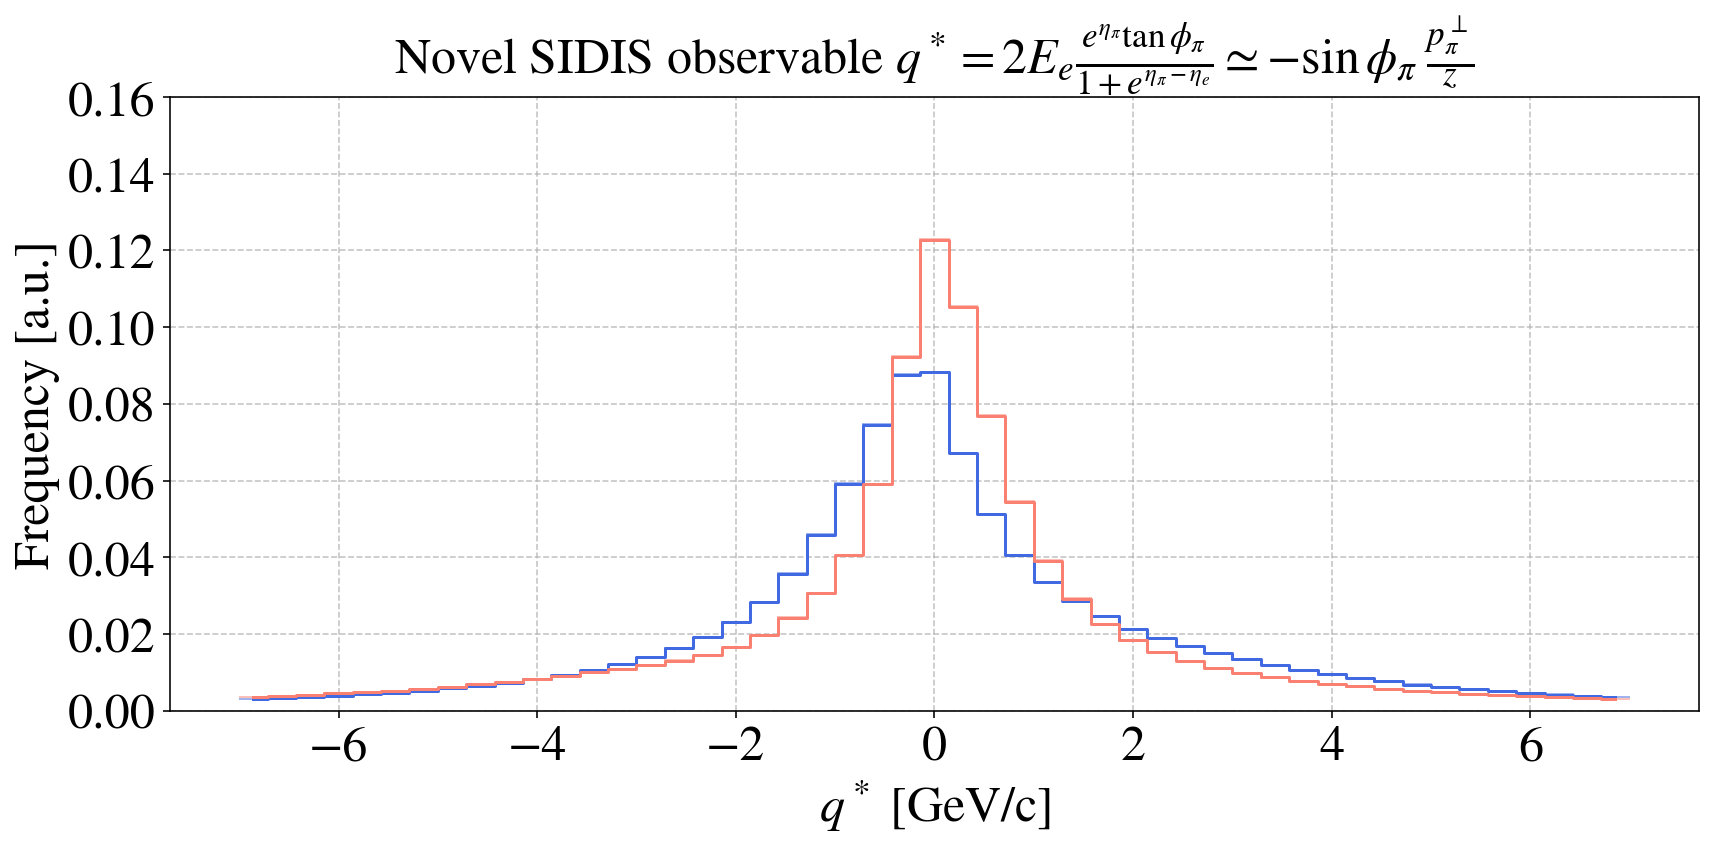

In [8]:
var,varlabel,varunits,bins = "qStar","$q^*$","[GeV/c]",np.linspace(-7,7,50)
ylim = (0.,0.16)
xticks = None; #(2,4,6)
fig = plt.figure(figsize=(12,6),tight_layout=True)
ax = fig.add_subplot(1,1,1)
for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,
                                                   pi_labels,pi_colors,[1,2]):    
    df = e_e_pi_pass_cuts[pi_ch]
    [x,
     h['untagged'+pi_ch],
     x_err,
     h_err['untagged'+pi_ch]] = plot_step_squares(df[var], 
                                                  ax=ax,                                                    
                                                  bins=bins,                                                   
                                                  density=True,                                                   
                                                  color=pi_color,                                                   
                                                  alpha=0.5,                                                   
                                                  label="$d(e,e'"+pi_label+")$" )
    ax.step(x,h['untagged'+pi_ch],'-',where='mid', color=pi_color )

set_axes(ax,varlabel + " " + varunits,
             'Frequency [a.u.]', 
             title=("Novel SIDIS observable " 
                    + "$q^* = 2E_{e}\\frac{e^{\eta_\pi}\\tan\phi_{\pi}}{1+e^{\eta_\pi-\eta_e}}"
                    +"\simeq −\sin \phi_\pi \;\\frac{p_\pi^\perp}{z}$"),
             do_add_grid=True, do_add_legend=False,
         ylim=ylim,
             xticks=xticks);

## (2.2) Add tagged data

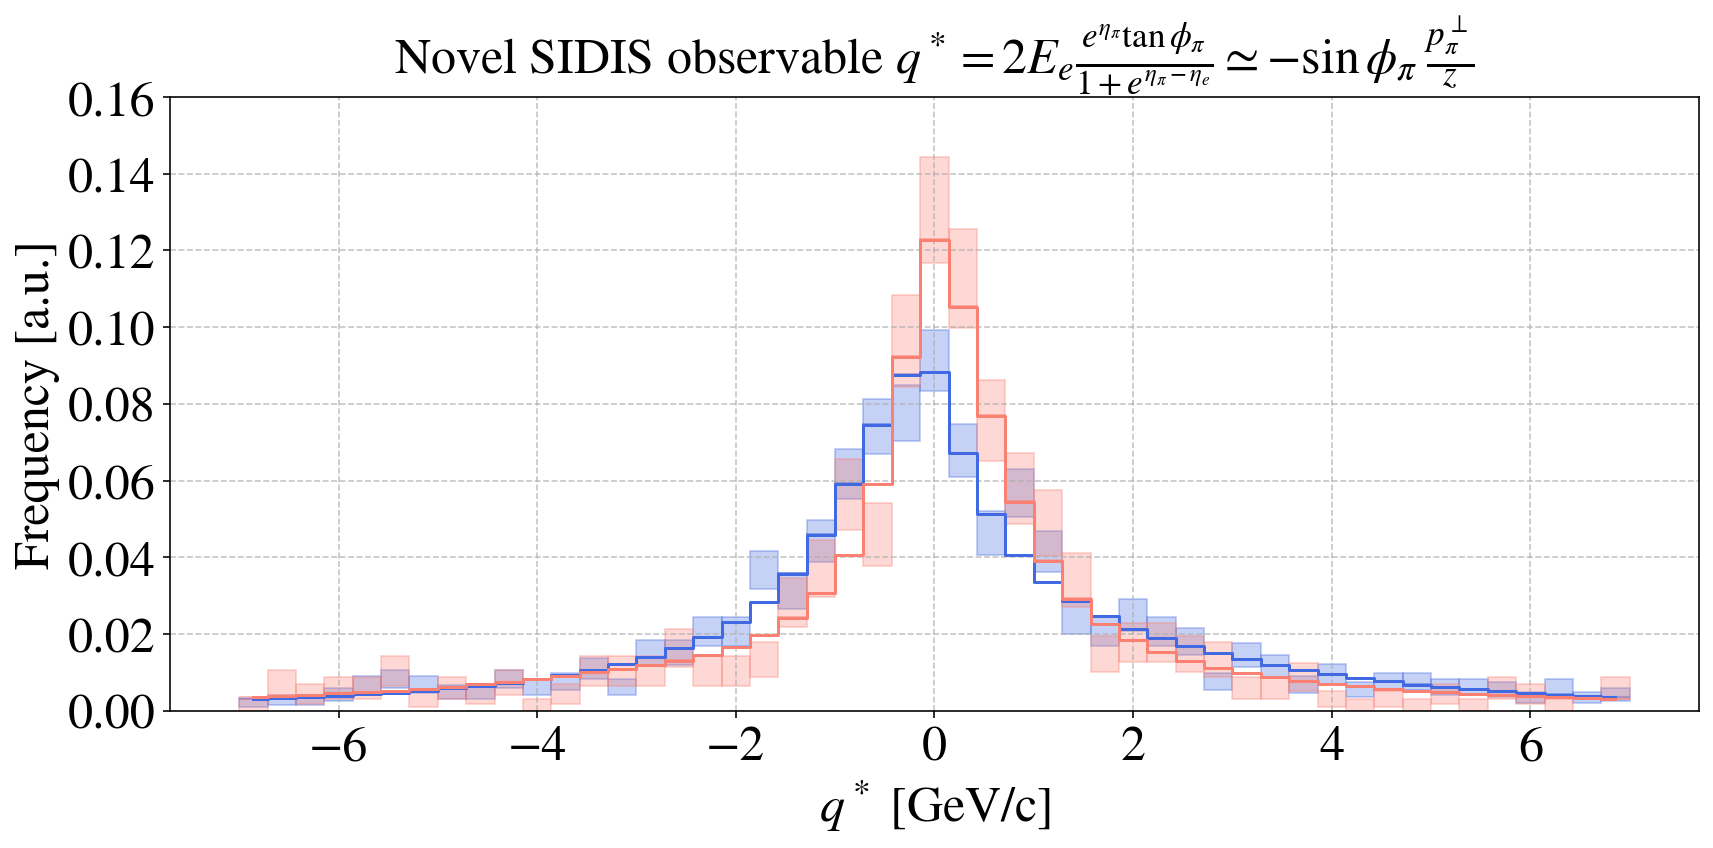

In [9]:
# var,varlabel,varunits,bins = "qStar","$q^*$","[GeV/c]",np.linspace(-7,7,50)

# xticks = None; #(2,4,6)
fig = plt.figure(figsize=(12,6),tight_layout=True)
ax = fig.add_subplot(1,1,1)
for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,
                                                   pi_labels,pi_colors,[1,2]):    
    df = e_e_pi_pass_cuts[pi_ch]
    [x, h['untagged'+pi_ch], x_err, h_err['untagged'+pi_ch]] = plot_step_squares(df[var], 
                                                  ax=ax,                                                    
                                                  bins=bins,                                                   
                                                  density=True,                                                   
                                                  color=pi_color,                                                   
                                                  alpha=0.5,                                                   
                                                  label="$d(e,e'"+pi_label+")$" )
    ax.step(x,h['untagged'+pi_ch],'-',where='mid', color=pi_color )


    df = e_e_pi_n_pass_cuts[pi_ch]
    [x, h['tagged'+pi_ch], x_err, h_err['tagged'+pi_ch]] = plot_step_squares(df[var], 
                                                  ax=ax,                                                    
                                                  bins=bins,                                                   
                                                  density=True,                                                   
                                                  color=pi_color,                                                   
                                                  alpha=0.3,                                                   
                                                  label="$d(e,e'"+pi_label+"n)$" )

set_axes(ax,varlabel + " " + varunits,
             'Frequency [a.u.]', 
             title=("Novel SIDIS observable " 
                    + "$q^* = 2E_{e}\\frac{e^{\eta_\pi}\\tan\phi_{\pi}}{1+e^{\eta_\pi-\eta_e}}"
                    +"\simeq −\sin \phi_\pi \;\\frac{p_\pi^\perp}{z}$"),
             do_add_grid=True, do_add_legend=False,
         ylim=ylim,
             xticks=xticks);

# (3) Subdivide contributions of different $q^*$ consistuents

<>:23: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:23: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/42/n5_htl9n34j9wpgd5rqsnmv40000gn/T/ipykernel_22162/4006832580.py:23: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if varfunction is "sin":


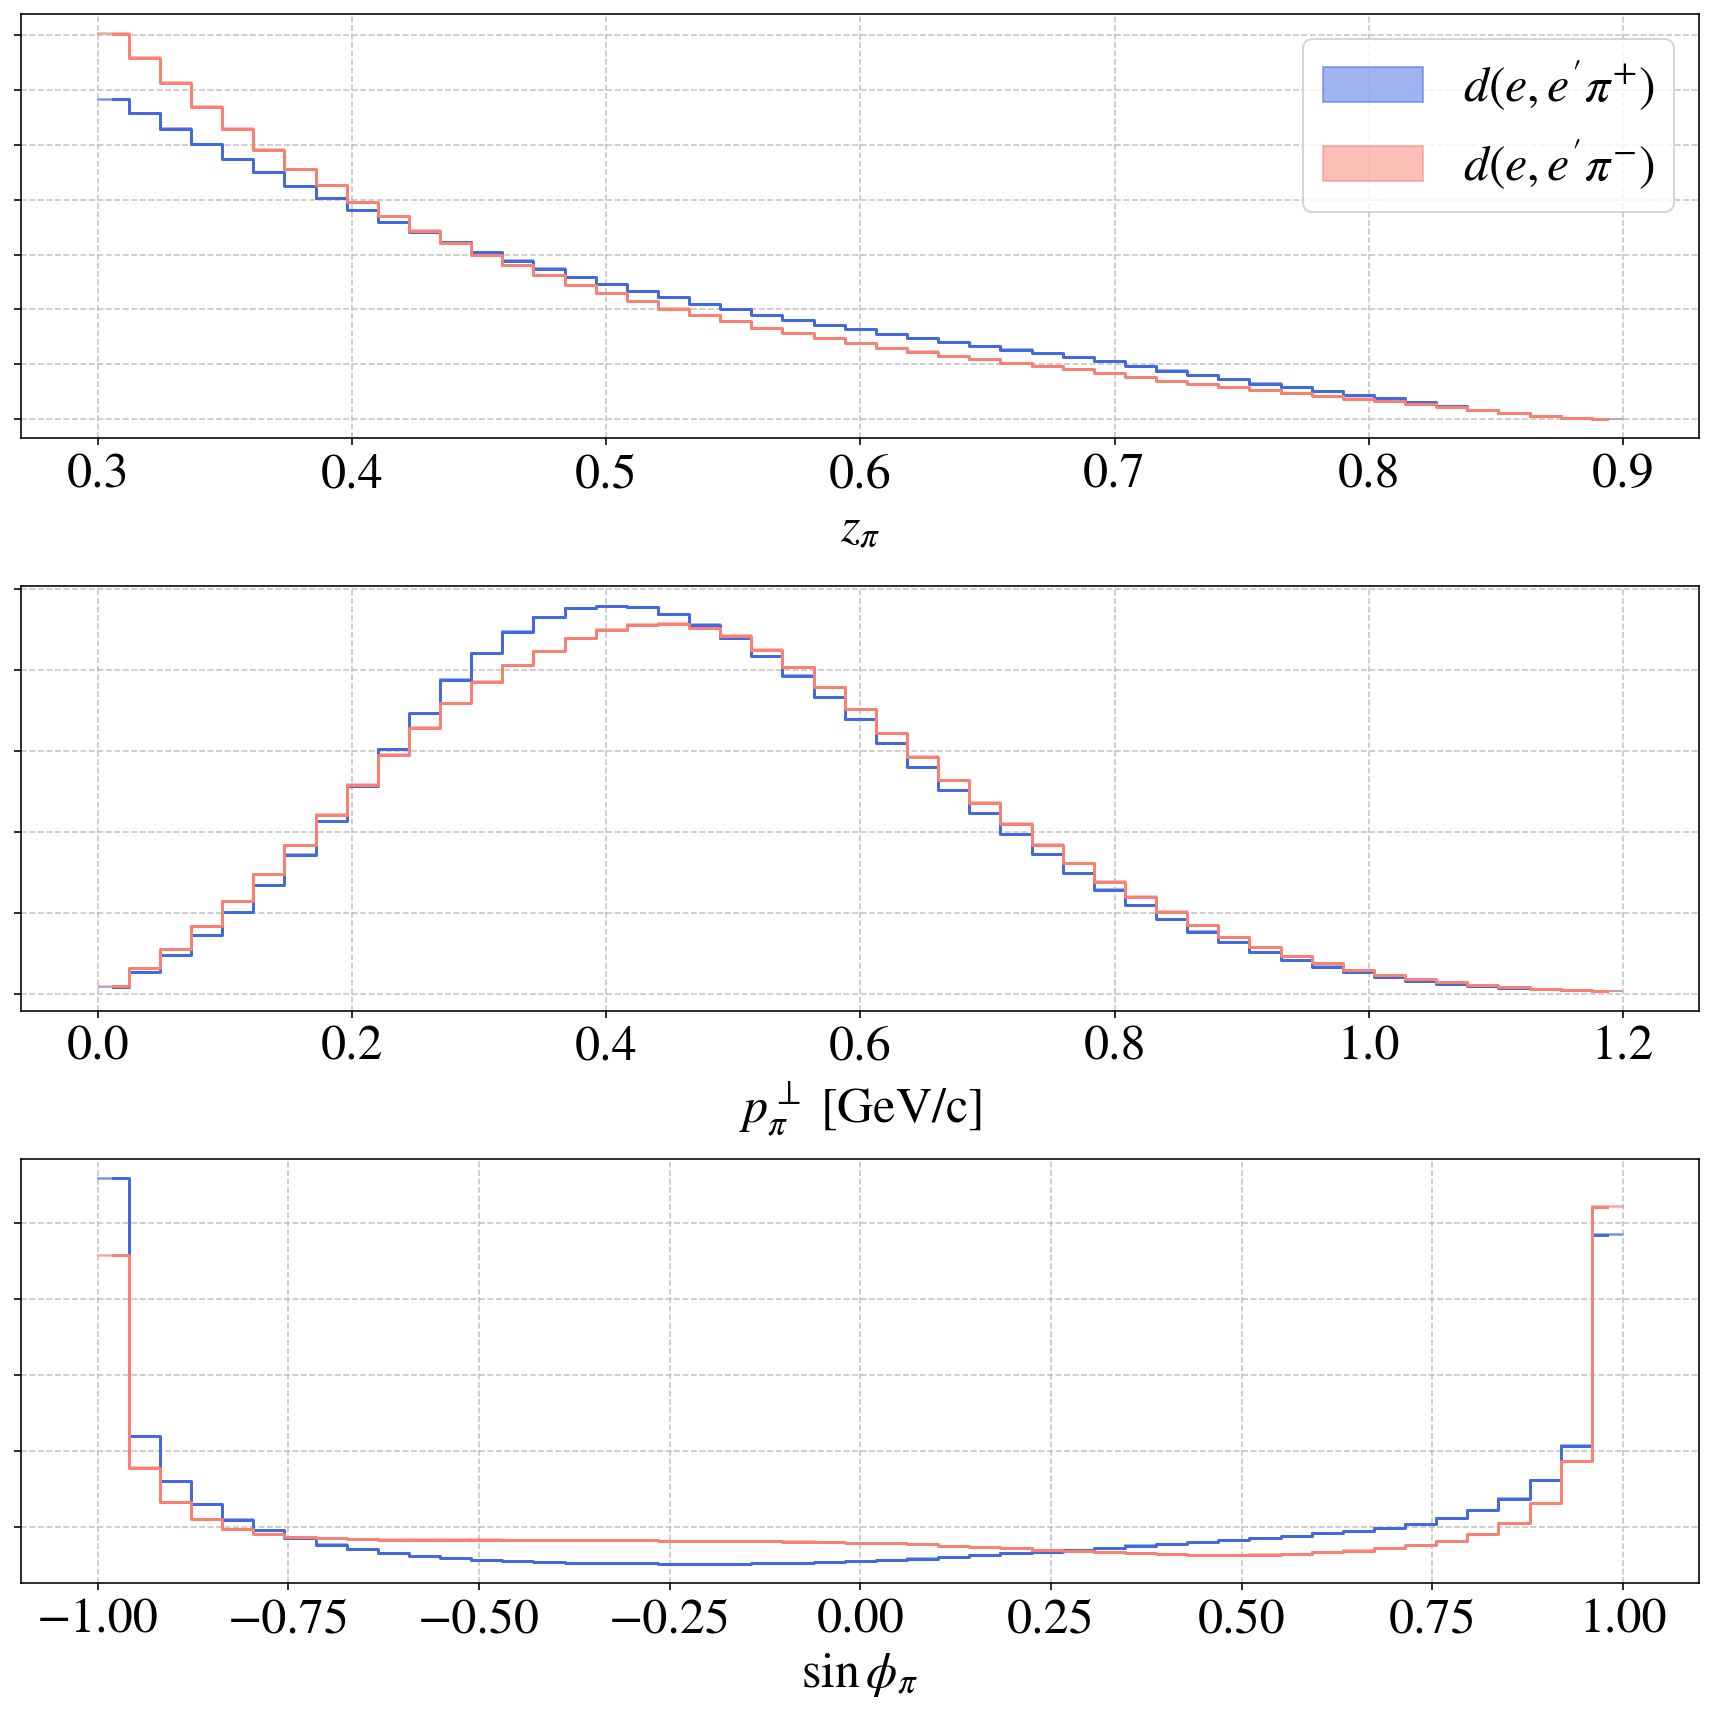

In [6]:
Nbins = 50
fig = plt.figure(figsize=(12,12),tight_layout=True)

for [var,
     varlabel,
     varunits,
     varfunction,
     bins,
     v_idx] in zip(["Zpi",    "pi_qFrame_pT", "pi_qFrame_Phi"],                                      
                   ["$z_\pi$","$p^\perp_\pi$","$\sin\phi_\pi$"],
                   ["",       "[GeV/c]",      ""],
                   ['',       '',             "sin"],
                   [np.linspace(0.3,0.9,Nbins),                   
                    np.linspace(0.0,1.2,Nbins),                    
                    np.linspace(-1,1,Nbins)],
                   [1,2,3]):

    xticks = None;
    ax = fig.add_subplot(3,1,v_idx);
    for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,
                                                       pi_labels,pi_colors,[1,2]):    
        df = e_e_pi_pass_cuts[pi_ch]
        if varfunction is "sin":
            step_results = plot_step_squares(np.sin(df[var]),
                                                      ax=ax,                                                    
                                                      bins=bins,                                                   
                                                      density=True,                                                   
                                                      color=pi_color,                                                   
                                                      alpha=0.5,                                                   
                                                      label="$d(e,e'"+pi_label+")$" )

        else:
            step_results = plot_step_squares(df[var], 
                                                      ax=ax,                                                    
                                                      bins=bins,                                                   
                                                      density=True,                                                   
                                                      color=pi_color,                                                   
                                                      alpha=0.5,                                                   
                                                      label="$d(e,e'"+pi_label+")$" )
        
        [x, h['untagged'+pi_ch], x_err, h_err['untagged'+pi_ch]] = step_results        
        ax.step(x,h['untagged'+pi_ch],'-',where='mid', color=pi_color )

    set_axes(ax,varlabel + " " + varunits,
                 '', remove_ticks_y=True,
                 do_add_grid=True, 
             do_add_legend=True if v_idx==1 else False,
                 xticks=xticks);